<a href="https://colab.research.google.com/github/WillianMachado95/FashionMNIST/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARNING

No  mundo  moderno,  somos  banhados  por  um  oceano  de  dados.  A  cada segundo,   uma   quantidade   exorbitante   de   informações   é   gerada,   capturada   e compartilhada   em   todas   as   esferas   da   nossa   sociedade   digitalizada.   Desde transações  comerciais  até  interações  em  redes sociais,  passando  por  registros médicos e dispositivos de IoT, os dados fluem incessantemente, inundando nossos sistemas de armazenamento e desafiando nossa capacidade de compreensão.

**como lidar com essa avalanche de dados e transformá-la em conhecimento acionável?**

**É aqui que o Deep Learning(DL) entra em cena, oferecendo promessas de descobertas revolucionárias em um mundo inundado de dados**

Deep  Learning(DL)  (Aprendizado  Profundo) é  uma  subárea  do  campo  de Inteligência Artificial(IA) que se concentra no treinamento de modelos de Machine Learning (ML)  (Aprendizado de Máquina)  em  conjuntos  de  dados  muito  grandes e complexos.

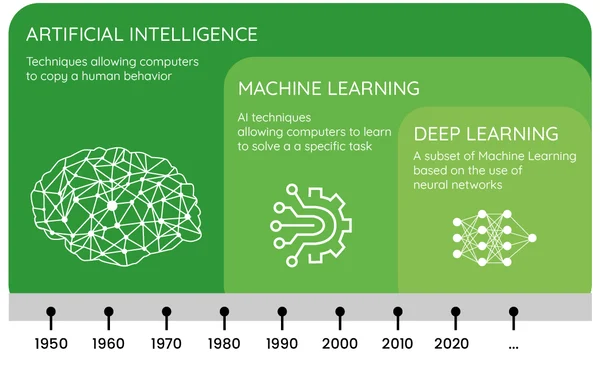

**Rede Neural**

Uma rede neural é um modelo computacional inspirado no cérebro humano, usado em inteligência artificial para processar dados, reconhecer padrões e realizar tarefas complexas. Ela funciona com nós interconectados (neurônios) organizados em camadas, onde cada conexão tem um peso que é ajustado durante o treinamento para refinar o desempenho do sistema.

Os  modelos  de  aprendizado  de  máquina  que  servem  de  base  para  o Deep Learning (DL) são Redes Neurais Artificiais(RNAs).A principal diferença entre o DL e as RNAs,   é   que   o   DL   emprega diversas camadas   ocultas para   aprender representações e correlações dos dados


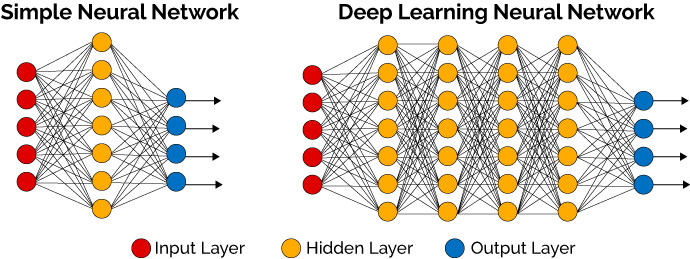

Ao  contrário  de  métodos  tradicionais  de  aprendizado  de  máquina,  que dependem  de  características  cuidadosamente  projetadas  e  extraídas  manualmente dos   dados,   o Deep   Learning aprende automaticamente   representações hierárquicas a partir de dados brutos

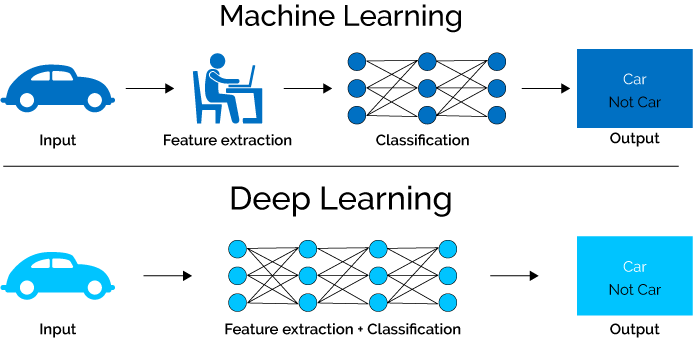

# DEEP LEARNING PARA CLASSIFICAÇÃO DE IMAGENS

https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

Utilizaremos a base “Fashion MNIST” já persistida no TensorFlow. Criada por Zalando  (uma  empresa  de  e-commerce  europeia),  essa  base é  uma  coleção  de imagens  de  artigos  de  moda,  composta por  70.000  imagens, divididas em um conjunto de treinamento de 60.000 imagens e um conjunto de teste de  10.000  imagens. .

 Cada  imagem  tem  uma  resolução  de  28x28  pixels  e  está associada a um label de uma das 10 classes, representando diferentes tipos de roupas e  acessórios.

**O  objetivo é  criar  um  modelo  preditivo  baseado  em  rede  neural  que possa classificar corretamente as imagens em suas respectivas categorias.**

In [ ]:
# ======= Bibliotecas Básicas ========
import numpy as np
import matplotlib.pyplot as plt

# ======== Deep Leraning ==========
import tensorflow as tf  #completo para computação numérica e criação/treinamento de modelos de machine learning e deep learning
from tensorflow import keras    # API de alto nível para deep learning
from tensorflow.keras import layers


**Carregando o Dataset Fashion MNIST**

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(imagens_treino, rotulo_treino), (imagens_teste, rotulo_teste) = fashion_mnist.load_data()

**Explorando dados**

In [ ]:
imagens_treino.shape

(60000, 28, 28)

In [ ]:
len(rotulo_treino)

60000

In [ ]:
rotulo_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
imagens_teste.shape

(10000, 28, 28)

O dataset Fashion MNIST usa números de 0 a 9 para representar cada tipo de roupa.
A lista class_names serve para converter esses números em nomes reais para podermos mostrar as classes de forma compreensível.

In [ ]:
class_names = [
"T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

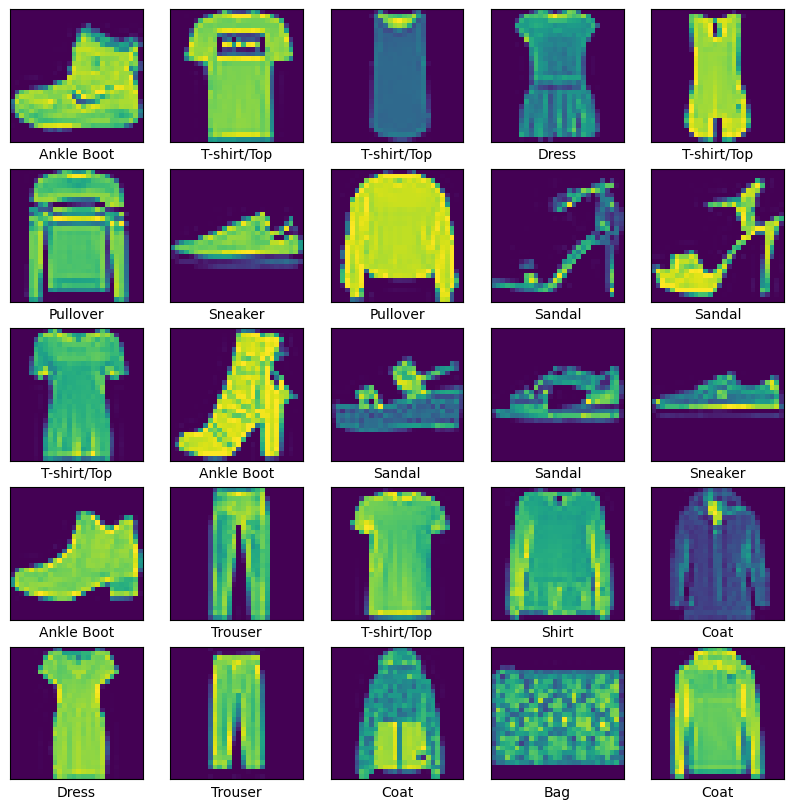

In [ ]:
# Exibir algumas imagens
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5, 5, i+1)
 plt.xticks([])
 plt.yticks([])
 plt.imshow(imagens_treino[i])
 plt.xlabel(class_names[rotulo_treino[i]])
plt.show()

**Normalização dos dados**

A fase de normalização é uma das etapas mais importantes no pré-processamento de dados para treinar modelos de deep learning. Quase todos os modelos de visão computacional são treinados com imagens normalizadas.

No Fashion MNIST, cada pixel da imagem possui um valor entre 0 e 255
(onde 0 = preto e 255 = branco).

Normalizar significa transformar esses valores para uma escala menor, normalmente entre 0 e 1

**Isso faz o modelo aprender mais rápido, com mais estabilidade e com maior acurácia, porque evita números muito grandes que atrapalham o cálculo dos gradientes.**

In [ ]:
# Normalizar os dados
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

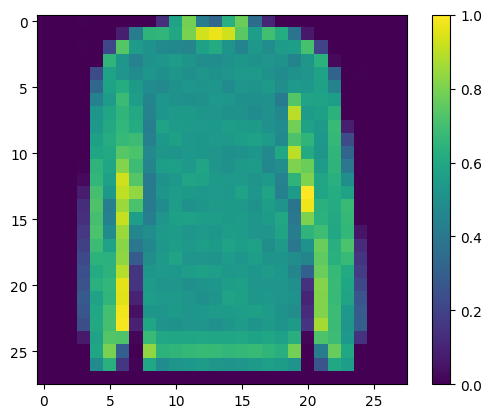

In [ ]:
plt.figure()
plt.imshow(imagens_treino[45])
plt.colorbar()
plt.grid(False)
plt.show()

**Criando modelo de Deep Learning (MLP)**

Um MLP (Multilayer Perceptron) é um tipo clássico de rede neural artificial, sendo uma das arquiteturas mais simples e mais importantes do deep learning. Ele é formado por múltiplas camadas densamente conectadas (dense layers)

In [ ]:
# Modelo MLP simples para Fashion MNIST
modelo = keras.Sequential([
    # converte 28x28 -> vetor de 784 valores por amostra
    layers.Flatten(input_shape=(28,28)),

    # camada densa com 128 neurônios e ReLU
    # -> responsável por aprender representações da imagem
    layers.Dense(128, activation='relu'),

    # regularização: durante treino, 20% dos neurônios são desligados aleatoriamente
    layers.Dropout(0.2),

    # camada de saída com 10 neurônios (10 classes) e softmax para probabilidades
    layers.Dense(10, activation='softmax')
])

# Compilação: otimizador Adam, perda adequada para rótulos inteiros,
# e métrica de performance
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Treinamento**

Esse bloco é o treinamento do modelo. É aqui que a rede neural realmente aprende.

O método fit recebe os dados de entrada + parâmetros e inicia o processo de treinamento usando backpropagation.

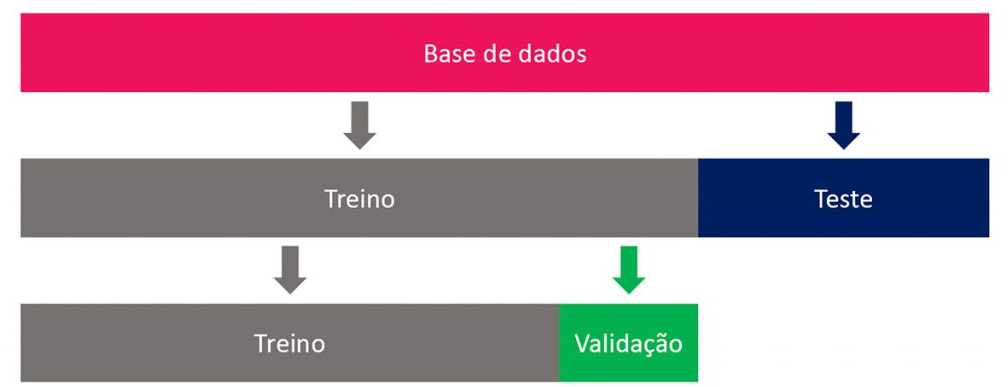


In [ ]:
treinamento = modelo.fit(
                      # Conjunto de imagens usadas para treinar a rede (entrada x e saída y)
                      imagens_treino, rotulo_treino,
                      # Número de vezes que a rede vai passar por TODO o dataset
                      # Mais épocas → aprende mais, mas pode causar overfitting
                      epochs=10,
                      # Separa automaticamente 20% do conjunto de treino para validação (a rede não treina com esses dados)
                      validation_split=0.2,
                      # Número de imagens processadas antes de cada atualização
                      batch_size=32
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7476 - loss: 0.7277 - val_accuracy: 0.8465 - val_loss: 0.4200
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8495 - loss: 0.4187 - val_accuracy: 0.8578 - val_loss: 0.3947
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8639 - loss: 0.3749 - val_accuracy: 0.8673 - val_loss: 0.3789
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8702 - loss: 0.3488 - val_accuracy: 0.8585 - val_loss: 0.3779
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8740 - loss: 0.3350 - val_accuracy: 0.8762 - val_loss: 0.3450
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8817 - loss: 0.3186 - val_accuracy: 0.8826 - val_loss: 0.3249
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8818 - loss: 0.3123 - val_accuracy: 0.8823 - val_loss: 0.3230
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8867 - loss: 0.298

**Avaliação**

O evaluate() é um  método que avalia o desempenho final do modelo usando um conjunto de dados que ele nunca viu durante: o teste.

Ele calcula:

- loss (erro)

- accuracy (taxa de acertos)

In [ ]:
perda, acuracia = modelo.evaluate(imagens_teste, rotulo_teste)
print(f"Acurácia no teste: {acuracia:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8797 - loss: 0.3478
Acurácia no teste: 0.8797


**Curvas de Treinamento**

Essa etapa é uma das mais importantes quando trabalhamos com redes neurais. Ela permite entender se o modelo realmente está aprendendo, identificar overfitting, underfitting e guiar melhorias no modelo.

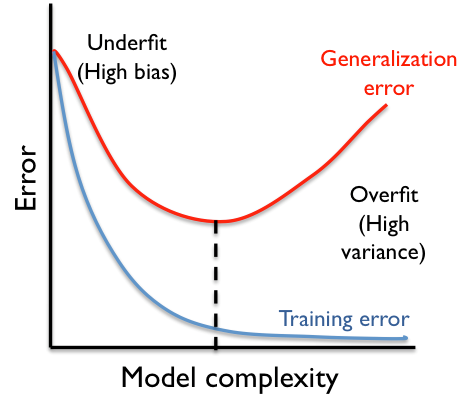

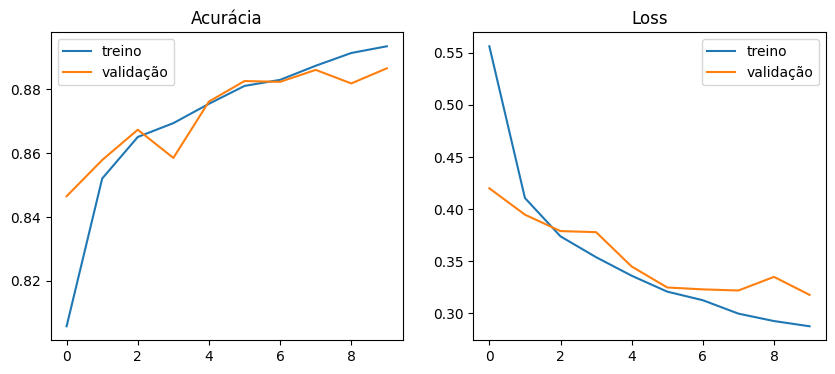

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(treinamento.history['accuracy'], label='treino')
plt.plot(treinamento.history['val_accuracy'], label='validação')
plt.title('Acurácia')
plt.legend()


plt.subplot(1,2,2)
plt.plot(treinamento.history['loss'], label='treino')
plt.plot(treinamento.history['val_loss'], label='validação')
plt.title('Loss')
plt.legend()
plt.show()

**Matriz de Confusão**

In [ ]:
predictions = modelo.predict(imagens_teste)

#matriz = tf.math.confusion_matrix(rotulo_teste,predictions.argmax(axis=1))
#print(matriz)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
tf.Tensor(
[[831   4  13  32   3   1 113   0   3   0]
 [  1 974   1  18   3   0   2   0   1   0]
 [ 19   0 789  19  98   0  74   0   1   0]
 [ 13  15   8 917  19   0  26   0   2   0]
 [  0   0 107  61 762   0  69   0   1   0]
 [  0   0   0   0   0 969   0  11   2  18]
 [114   0  82  36  59   0 699   0  10   0]
 [  0   0   0   0   0  29   0 957   0  14]
 [  5   0   2   7   4   5  12   4 961   0]
 [  0   0   0   0   0   7   1  54   0 938]], shape=(10, 10), dtype=int32)


In [ ]:
import numpy as np
import scipy

scipy.interp = np.interp

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

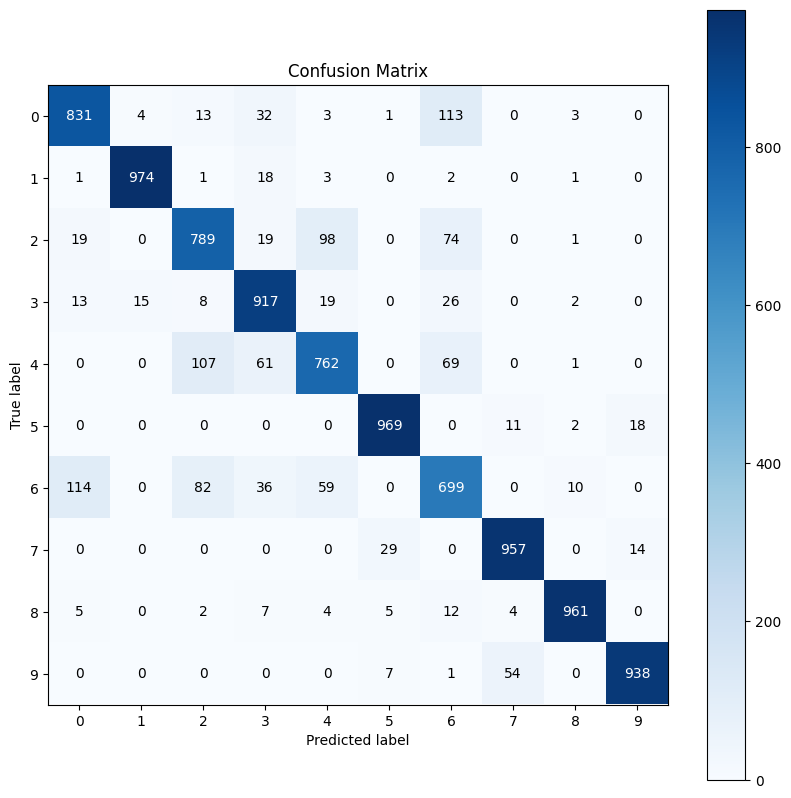

In [ ]:
! pip install scikit-plot
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(rotulo_teste,predictions.argmax(axis=1),figsize=(10,10))

**Métricas importantes**

**Precision** = “Quando o modelo prevê X, ele acerta?”

**Recall** = "Entre tudo o que realmente pertence àquela classe, quantos o modelo encontrou?"

**F1-Score** = Equilíbrio entre precisão e recall (Média Harmônica dos dois)

**Support** = Quantidade de exemplos da classe no conjunto de teste.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(rotulo_teste, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.79      0.79      0.79      1000
           3       0.84      0.92      0.88      1000
           4       0.80      0.76      0.78      1000
           5       0.96      0.97      0.96      1000
           6       0.70      0.70      0.70      1000
           7       0.93      0.96      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

